In [1]:
# 数据来源: <利用Python进行数据分析-bitly_usa_gov>

import json
from collections import defaultdict,Counter
import pandas as pd
import seaborn as sns
import numpy as np
pd.options.mode.chained_assignment = None

# path='E://study//Demo//Data_Demo//Python//resource//datasets//example.txt'
path='E://study//demo//Data_Demo//Python//resource//datasets//example.txt'
records = [json.loads(line) for line in open(path)]
records[:1]

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]}]

In [33]:
def get_totals(sequence):
    counts={}
    for x in sequence:
        if x in counts:
            counts[x]+=1
        else:
            counts[x]=1
    return counts

def get_totals_2(sequence):
    counts=defaultdict(int)
    for x in sequence:
        counts[x]+=1
    return counts

def top_counts(count_dict,n=10):
    value_key_pairs = [(count,tz) for tz,count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

time_zones = [rec['tz'] for rec in records if 'tz' in rec]
top_counts(get_totals_2(time_zones))

# Counter(time_zones).most_common(10)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

<AxesSubplot:>

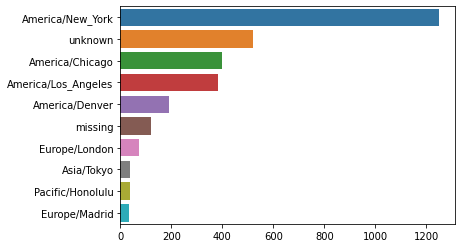

In [34]:
frame = pd.DataFrame(records)
clean_tz = frame['tz'].fillna('missing')
clean_tz[clean_tz=='']='unknown'
tz_counts = clean_tz.value_counts()
subset = tz_counts[:10]
sns.barplot(y=subset.index,x=subset.values)

In [45]:
cframe = frame[frame.a.notnull()]
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
by_tz_os = cframe.groupby(['tz', 'os'])
agg_counts = by_tz_os.size().unstack(level=-1).fillna(0)
indexer = agg_counts.sum(1).argsort()
count_subset = agg_counts.take(indexer[-10:])
count_subset[:5]

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0


<AxesSubplot:xlabel='normed_total', ylabel='tz'>

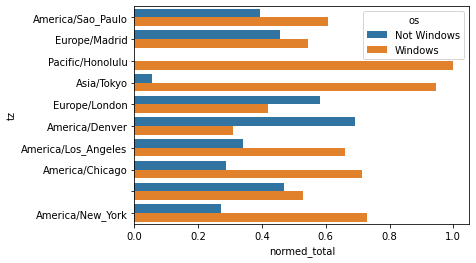

In [46]:
count_subset = count_subset.stack()
count_subset.name='total'
count_subset = count_subset.reset_index()

def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)
# sns.barplot(x='total',y='tz',hue='os',data=count_subset)
sns.barplot(x='normed_total',y='tz',hue='os',data=results)